In [1]:
from functools import wraps

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Generative model for globe toss

Globe can turn up with either water or land with probability p and (1-p) respectively.
Here we forget that this could be represented through a binomial distribution.

In [45]:
def replicate_function(n):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            outs = []
            for i in range(n):
                out = func(*args, **kwargs)
                outs.append(out)
            return outs
        return wrapper
    return decorator


# @replicate_function(10)
def run_globe_experiment(num_tosses, p_water):
    values = ["W", "L"]
    probs = [p, 1-p]
    return np.random.choice(values, p=probs, size=num_tosses)


def compute_posterior(sample, poss, sides):
    W = sum(sample == "W")
    L = sum(sample == "L")
    ways = (sides * poss)**W * ((sides * (1 - poss))**L)
    post = ways / sum(ways)
    return post

In [67]:
sides=20
num_tosses = 10
p = 0.75
values = ["W", "L"]
probs = [p, 1-p]
poss = np.linspace(0, 1, sides+1)

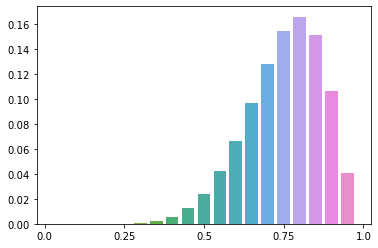

In [99]:
post = compute_posterior(run_globe_experiment(num_tosses=num_tosses, p_water=p), poss=poss, sides=sides)
fig, ax = plt.subplots()
g = sns.barplot(x=poss, y=post, ax=ax)
ticks = g.get_xticks()
g.set_xticks([tick_num for tick_num in ticks if tick_num / 20 in np.linspace(0, 1, 5)])

In [69]:
poss_mult = np.repeat(poss, 100)
post_mult = np.zeros(shape=(100, len(poss)))
for i in range(100):
    post_mult[i, :] = compute_posterior(run_globe_experiment(num_tosses=num_tosses, p_water=p), poss=poss, sides=sides)
post_mult = post_mult.reshape(-1, order="F")

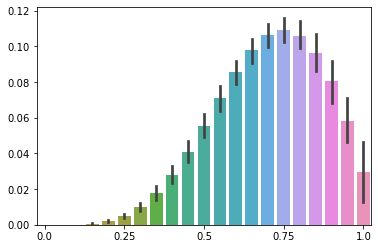

In [101]:
fig, ax = plt.subplots()
g = sns.barplot(
    x=poss_mult, 
    y=post_mult, 
    ax=ax,
    estimator=np.mean,
    ci=87
)
ticks = g.get_xticks()
g.set_xticks([tick_num for tick_num in ticks if tick_num / 20 in np.linspace(0, 1, 5)]);